In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import covid

pd.set_option('display.max_rows', 50)

In [7]:
cov = covid.Covid()
data = cov.getData()
data

,SNo,ObservationDate,Country,Last Update,Cases,DailyNewCases,Deaths,Recovered,Open,Closed,Population
0,36,01/22/2020,Japan,1/22/2020 17:00,2.0,2.0,0.0,0.0,2.0,0.0,126529100
1,74,01/23/2020,Japan,1/23/20 17:00,1.0,-1.0,0.0,0.0,1.0,0.0,126529100
2,120,01/24/2020,Japan,1/24/20 17:00,2.0,1.0,0.0,0.0,2.0,0.0,126529100
3,161,01/25/2020,Japan,1/25/20 17:00,2.0,0.0,0.0,0.0,2.0,0.0,126529100
4,207,01/26/2020,Japan,1/26/20 16:00,4.0,2.0,0.0,1.0,3.0,1.0,126529100
...,...,...,...,...,...,...,...,...,...,...,...
8957,15270,04/15/2020,Sao Tome and Principe,2020-04-15 23:04:26,4.0,0.0,0.0,0.0,4.0,0.0,211028
8958,15590,04/16/2020,Sao Tome and Principe,2020-04-16 23:38:19,4.0,0.0,0.0,0.0,4.0,0.0,211028
8959,15910,04/17/2020,Sao Tome and Principe,2020-04-17 23:38:48,4.0,0.0,0.0,0.0,4.0,0.0,211028
8960,16230,04/18/2020,Sao Tome and Principe,2020-04-18 22:40:18,4.0,0.0,0.0,0.0,4.0,0.0,211028


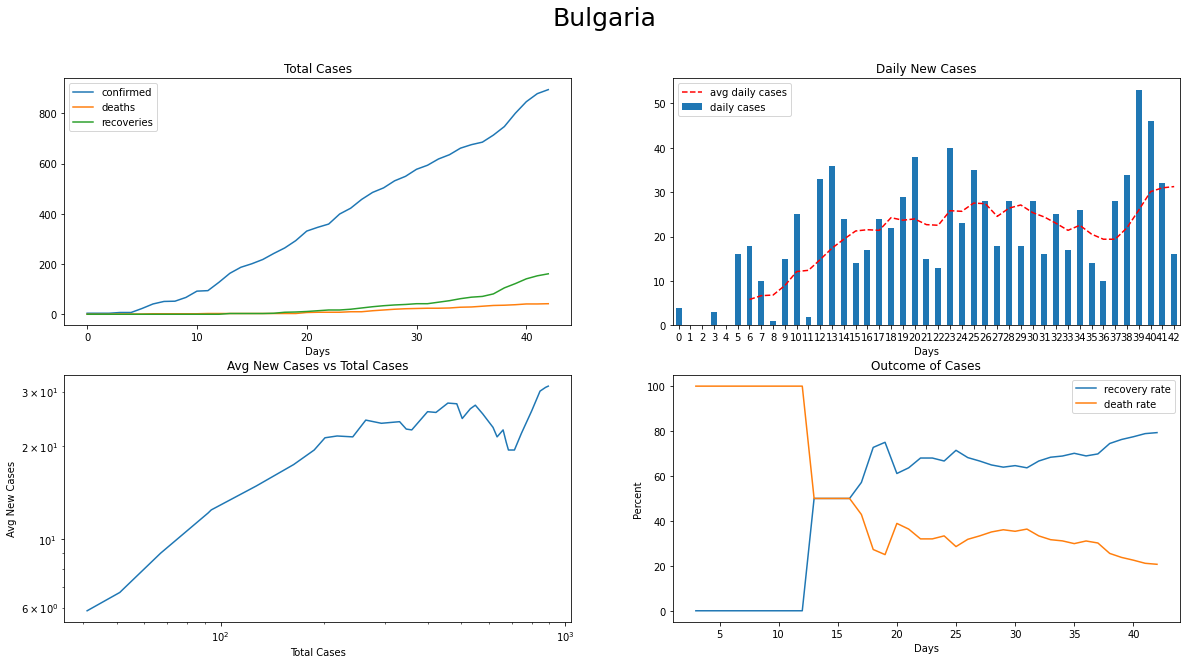

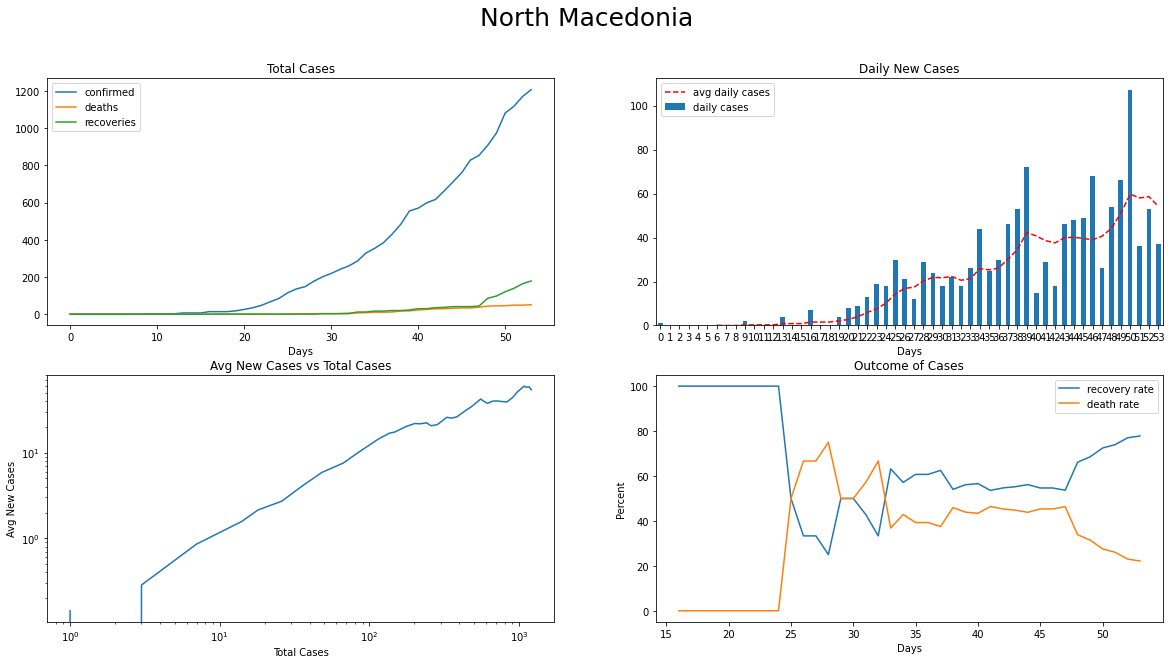

In [3]:
cov.plotCountriesStatus(['Bulgaria', 'North Macedonia'])

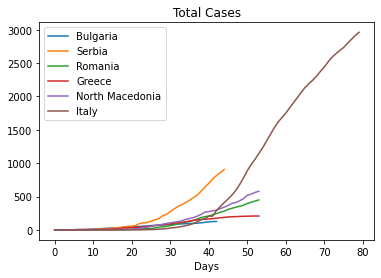

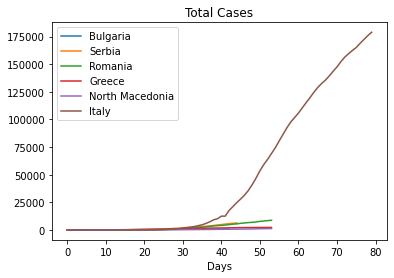

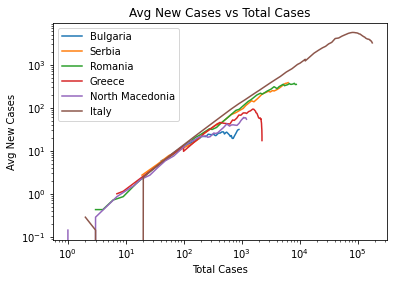

In [4]:
countries = ['Bulgaria', 'Serbia', 'Romania', 'Greece', 'North Macedonia', 'Italy']
cov.plotAllInOne(cov.plotTotalCases, countries, scale_by='Population', factor=1000000)
cov.plotAllInOne(cov.plotTotalCases, countries)
cov.plotAllInOne(cov.plotLogDailyAvgByLogTotalCases, countries)